In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from datasets import concatenate_datasets, load_dataset


In [9]:
raw_data = pd.read_csv('../datasets/annotated_data.csv', encoding='utf-8')
raw_data

,text,Order,topic,topic_number,five_emo,three_emo_0n1n2p,three_emo_0n1n2p2
0,"accessibility options are very diverse, maybe...",18,Accessibility options,2,4.0,2,0
1,the colour schemes for stars and economies ar...,313,Accessibility options,2,1.0,0,2
2,there is still no left-handed support,371,Accessibility options,2,1.0,0,2
3,"Also, every time the state of your suit is upd...",566,Accessibility options,2,4.0,2,0
4,As a left handed I can't play this game the wa...,657,Accessibility options,2,1.0,0,2
...,...,...,...,...,...,...,...
3106,seeing it on my Wishlist for way too long.,2137,Wishlist and Notifications,30,3.0,1,1
3107,this game has been on my Wishlist since the pr...,2714,Wishlist and Notifications,30,4.0,2,0
3108,this game should be the next on your Wishlist.,2766,Wishlist and Notifications,30,5.0,2,0
3109,This game was in my Wishlist for a while,2771,Wishlist and Notifications,30,3.0,1,1


In [12]:
raw_data["text_len"] = raw_data["text"].apply(lambda x : len(x.split()))

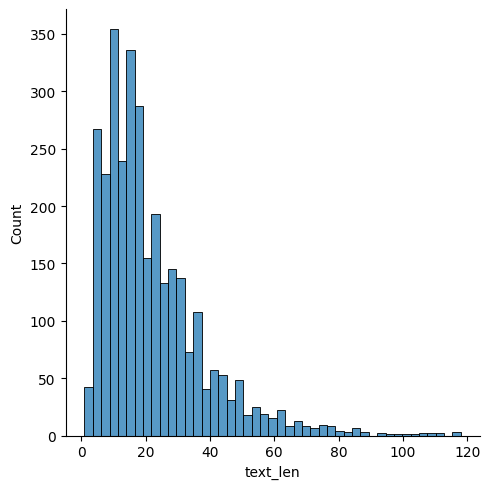

In [13]:
sns.displot(raw_data.text_len, kde=False)

In [15]:
print("The longest review has: {} words".format(raw_data.text_len.max()))

The longest review has: 118 words


<Axes: ylabel='five_emo'>

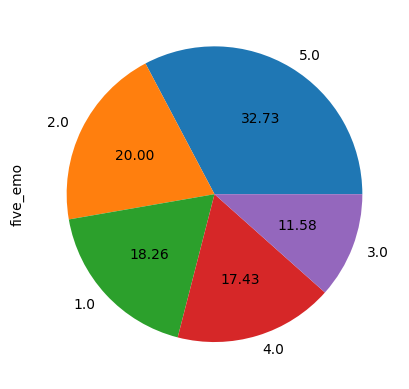

In [17]:
raw_data.five_emo.value_counts().plot(kind = 'pie', autopct="%.2f")

<Axes: ylabel='three_emo_0n1n2p'>

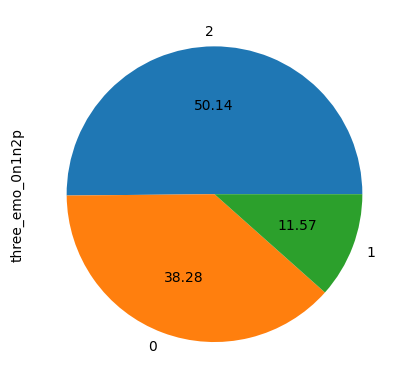

In [18]:
raw_data.three_emo_0n1n2p.value_counts().plot(kind = 'pie', autopct="%.2f")

# Same ratio 

In [36]:
train_dataset_ratio, test_dataset_ratio = train_test_split(raw_data, test_size=0.3, stratify=raw_data['three_emo_0n1n2p'], random_state=42)

In [38]:
train_dataset_ratio

,text,Order,topic,topic_number,five_emo,three_emo_0n1n2p,three_emo_0n1n2p2,text_len
2087,"stories with intrigue, character development ...",303,Narrative,53,2.0,0,2,7
1569,I also think it would be better if they devel...,136,Interaction and Socialisation,51,2.0,0,2,27
655,the devs do not seem to have what it takes to...,318,Developer,43,2.0,0,2,17
1060,... we are discovering language of aliens but ...,450,Exploration,47,2.0,0,2,24
798,"Being a difficult game it is,",726,Difficulty and Game Balance,44,2.0,0,2,6
...,...,...,...,...,...,...,...,...
2327,When a player settles down on a planet and mak...,2930,Ownership,22,4.0,2,0,30
753,I'm sure it will be better after some time in ...,1548,Development states,37,2.0,0,2,12
2789,"Gunfights are scary, loud, and you feel relie...",127,Survival mechanics,12,5.0,2,0,20
1682,I enjoy going with a full team being commander...,1209,Interaction and Socialisation,51,5.0,2,0,28


<Axes: ylabel='five_emo'>

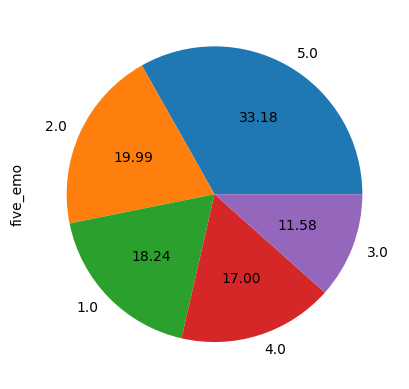

In [49]:
train_dataset_ratio.five_emo.value_counts().plot(kind = 'pie', autopct="%.2f")

In [39]:
test_dataset_ratio

,text,Order,topic,topic_number,five_emo,three_emo_0n1n2p,three_emo_0n1n2p2,text_len
2909,"in addition, the developers made the game as a...",1554,Updates,60,3.0,1,1,79
1624,as trolls will gladly make them inaccessible.,681,Interaction and Socialisation,51,1.0,0,2,7
2550,"l, kinda pricey too even after discount it jus...",1750,Price-quality ratio,38,2.0,0,2,14
1116,"There's still lots for me to discover for now,",2680,Exploration,47,5.0,2,0,9
2271,"you ""cannot"" talk about this game and not talk...",3032,Novelty,54,2.0,0,2,61
...,...,...,...,...,...,...,...,...
1016,still knows it's a GAME and is firmly focused ...,2240,Engaging Gameplay,46,5.0,2,0,19
486,Sometimes the 'profanity' filter disallows som...,2213,Content filter,16,2.0,0,2,50
76,"the sound for this game is really good, guns f...",2568,Audio,39,5.0,2,0,30
1812,The hostages are governed by some of the worst...,2461,Interaction and Socialisation,51,1.0,0,2,85


In [40]:
train_dataset_ratio.to_csv('../datasets/SA_same_ratio/train_dataset_ratio.csv',index=False)
test_dataset_ratio.to_csv('../datasets/SA_same_ratio/test_dataset_ratio.csv',index=False)

# Balanced train

In [57]:
df = raw_data

# Set random seed for reproducibility
random_state = 42

# Group by the column to balance
grouped = df.groupby('three_emo_0n1n2p')

# Find the minimum group size to balance the train dataset
min_size = min(len(group) for name, group in grouped)

# Sample min_size elements from each group to create the train dataset
train_df = grouped.apply(lambda x: x.sample(min_size, random_state=random_state)).reset_index(drop=True)

# Create the test dataset with the remaining data
remaining_df = df.drop(train_df.index)
test_df = remaining_df.sample(frac=1, random_state=random_state).reset_index(drop=True)  # Shuffle the test dataset


In [58]:
train_df

,text,Order,topic,topic_number,five_emo,three_emo_0n1n2p,three_emo_0n1n2p2,text_len
0,"I will say that on lower end PCs,",1437,Platforms,57,2.0,0,2,8
1,Not sure if it's possible would also like to ...,273,Content filter,16,2.0,0,2,20
2,won’t hesitate to ban / mute you no matter the...,3012,Content filter,16,1.0,0,2,30
3,This has soft locked one of my saves as it now...,2778,Bugs & Crashing,40,1.0,0,2,15
4,This is hands down the worst tutorial I have e...,2790,Guide and Tutorials,20,1.0,0,2,27
...,...,...,...,...,...,...,...,...
1075,two point hospital is a fantastic business sim...,2855,Management mechanics,14,5.0,2,0,20
1076,"good game culture, community events are a nice...",1041,Interaction and Socialisation,51,5.0,2,0,35
1077,the game does a very good job of making each l...,2383,Game progression,49,5.0,2,0,16
1078,"Got out of ship, fell through terrain, landed ...",1051,Narrative,53,4.0,2,0,41


<Axes: ylabel='three_emo_0n1n2p'>

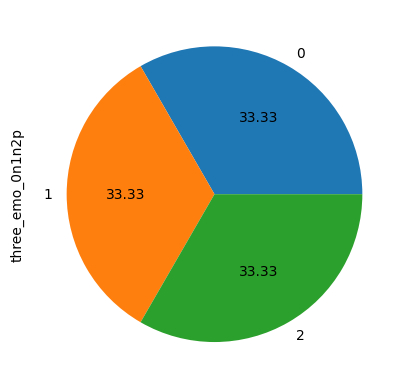

In [60]:
train_df.three_emo_0n1n2p.value_counts().plot(kind = 'pie', autopct="%.2f")

In [59]:
test_df

,text,Order,topic,topic_number,five_emo,three_emo_0n1n2p,three_emo_0n1n2p2,text_len
0,sit back and watch the TK's happen as you try...,2154,Interaction and Socialisation,51,3.0,1,1,29
1,path finding looks more flexible in narrow are...,2024,Movement mechanics,6,4.0,2,0,11
2,but I loved playing with random people helping...,761,Interaction and Socialisation,51,5.0,2,0,15
3,"However, one thing I would recommend is that w...",1122,Interaction and Socialisation,51,2.0,0,2,83
4,that is so damb to have 5-6 separate spaces…,2269,Visual and atmosphere,62,1.0,0,2,9
...,...,...,...,...,...,...,...,...
2026,all the levels feel the same.,551,Novelty,54,2.0,0,2,6
2027,as normally prefer consoles but when I found ...,59,Platforms,57,2.0,0,2,43
2028,"takes a while to get used to the controls, but...",2257,Learnability,52,2.0,0,2,23
2029,I rarely buy games above $40 as such I recomme...,1372,Price-quality ratio,38,4.0,2,0,14


<Axes: ylabel='three_emo_0n1n2p'>

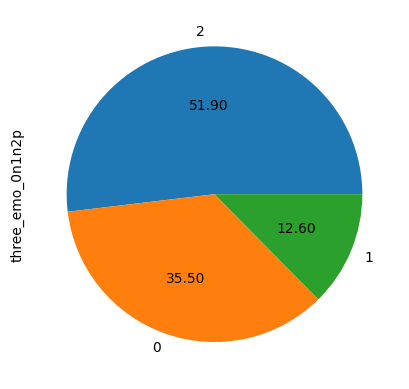

In [61]:
test_df.three_emo_0n1n2p.value_counts().plot(kind = 'pie', autopct="%.2f")

In [63]:
train_df.to_csv('../datasets/SA_balanced_train/train_df_balanced.csv',index=False)
test_df.to_csv('../datasets/SA_balanced_train/test_df_imbalanced.csv',index=False)

# test add tweet to balance

In [66]:
dataset_tweet= load_dataset("cardiffnlp/tweet_sentiment_multilingual", "english")
dataset_tweet

Found cached dataset tweet_sentiment_multilingual (C:/Users/researcher/.cache/huggingface/datasets/cardiffnlp___tweet_sentiment_multilingual/english/0.1.0/936afd3cde120393429606f681b3b48d526873c45114068973f71e296ce80605)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1839
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 324
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 870
    })
})

In [93]:
df_train = dataset_tweet['train'].to_pandas()
df_train

,text,label
0,okay i\u2019m sorry but TAYLOR SWIFT LOOKS NOT...,0
1,@user the DC comics site has Batman 44 release...,1
2,"""Frank Gaffrey\u002c Cliff May\u002c Steve Eme...",2
3,The tragedy of only thinking up hilarious twee...,0
4,"""Oliseh meets with Victor Moses in London: Sup...",1
...,...,...
1834,"""'Wanna go to the first freshers party?' 'Na I...",1
1835,"""Tianna- Happy Sunday! (Sips coffee...) Ah, le...",2
1836,"@user Mulcair, Trudeau and May are all weaklin...",0
1837,"""Sunday, during the Q&amp;A segment of the Mis...",1


In [94]:
neutraldata=df_train[df_train.label == 1]
neutraldata

,text,label
1,@user the DC comics site has Batman 44 release...,1
4,"""Oliseh meets with Victor Moses in London: Sup...",1
7,@user WAIT WHAT?!?! SCOTUS makes laws!?!? sinc...,1
10,@user haven't started! I've been too caught up...,1
13,Rodeo Saturday anyone going?,1
...,...,...
1825,Man I hope she doesn't Frank Ocean us,1
1828,Peter did you miss this? #TREND Runako Morton,1
1831,Big Brother starting next Friday? At the end o...,1
1834,"""'Wanna go to the first freshers party?' 'Na I...",1


In [95]:
negativedata=df_train[df_train.label == 0]
negativedata

,text,label
0,okay i\u2019m sorry but TAYLOR SWIFT LOOKS NOT...,0
3,The tragedy of only thinking up hilarious twee...,0
6,it looks like a beautiful night to throw mysel...,0
9,I wanna go to the studio with Ulysses n them t...,0
12,@user a bit frustrating. I don\u2019t think I\...,0
...,...,...
1824,Erdogan comments on recent escalation of viole...,0
1827,Gregg Williams may never find a job in the NFL...,0
1830,Kobe in the 4th is like Eli Manning. #Beware,0
1833,"""You never forget your first love, not surpris...",0


In [96]:
negativedata=negativedata[:150]

In [97]:
gamedata = pd.DataFrame({'text': test_df['text'],
                     'label':test_df['three_emo_0n1n2p']},
                       columns = ['text','label']
                       )
gamedata

,text,label
0,sit back and watch the TK's happen as you try...,1
1,path finding looks more flexible in narrow are...,2
2,but I loved playing with random people helping...,2
3,"However, one thing I would recommend is that w...",0
4,that is so damb to have 5-6 separate spaces…,0
...,...,...
2026,all the levels feel the same.,0
2027,as normally prefer consoles but when I found ...,0
2028,"takes a while to get used to the controls, but...",0
2029,I rarely buy games above $40 as such I recomme...,2


In [98]:
df = [gamedata, neutraldata,negativedata]
df = pd.concat(df)

<Axes: ylabel='label'>

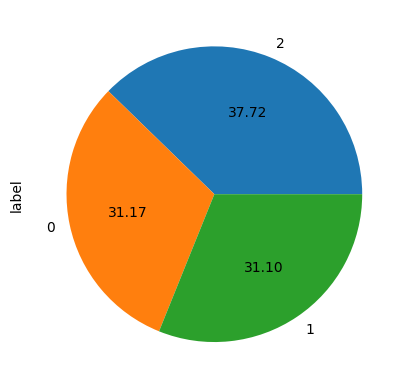

In [99]:
df.label.value_counts().plot(kind = 'pie', autopct="%.2f")

In [100]:
df.to_csv('../datasets/SA_balanced_train/test_df_balanced_tweets.csv',index=False)